In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [17]:
df=pd.read_csv("boston.csv");
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [18]:
ndf=df.dropna(axis=0,how="any")
ndf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: xlabel='RM', ylabel='MEDV'>

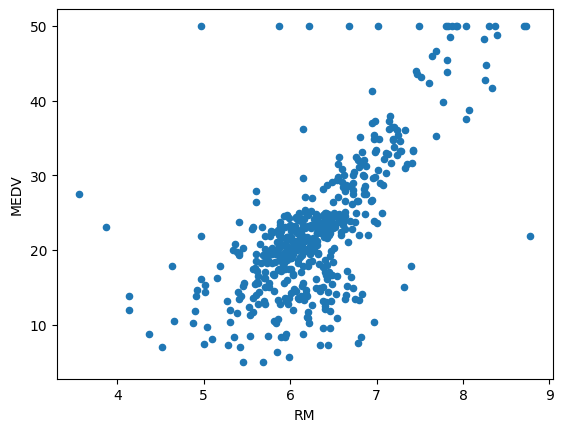

In [21]:
ndf.plot.scatter('RM','MEDV')

In [8]:
X=ndf[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=ndf['MEDV']

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [10]:
lm=LinearRegression()
lm.fit(X_train,y_train)
pred=lm.predict(X_test)

Text(0, 0.5, 'predict')

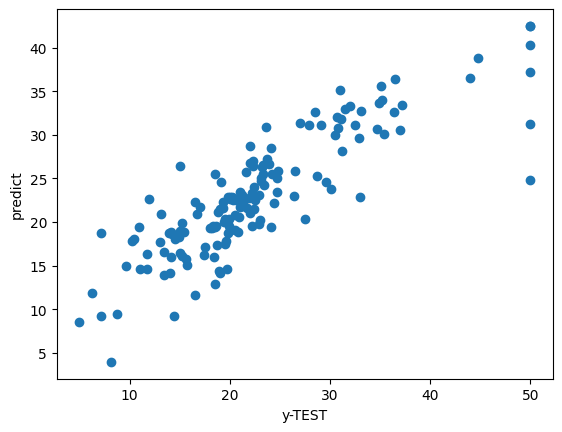

In [11]:
plt.scatter(y_test,pred)
plt.xlabel('y-TEST')
plt.ylabel('predict')

In [12]:
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,pred)))
df1=pd.DataFrame({'Actual ':y_test,'predict':pred,'variance':y_test-pred})
df1

MAE :  3.4827466373314846
MSE : 23.636376550401
RMSE : 4.861725676177236


,Actual,predict,variance
410,15.0,16.443220,-1.443220
501,22.4,24.000179,-1.600179
106,19.5,17.492790,2.007210
436,9.6,14.990988,-5.390988
2,34.7,30.711654,3.988346
...,...,...,...
455,14.1,15.929324,-1.829324
8,16.5,11.605465,4.894535
212,22.4,21.507018,0.892982
266,30.7,32.001913,-1.301913


In [13]:
from sklearn.metrics import r2_score
score=round(r2_score(y_test,pred)*100,2)
print('r2 score',score)

r2 score 72.07
